In [1]:
pip install -q paretoset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.8 MB/s eta 0:00:00


In [46]:
import numpy as np
import random
import matplotlib.pyplot as plt
from paretoset import paretoset

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)
num_centers = 5
num_areas = 15
num_resource_types = 3

# Sample distance matrix, priority levels, area demands, and resource limits
distance_matrix = np.random.randint(1, 51, size=(num_centers, num_areas))
priority_levels = [random.choice([1, 2, 3]) for _ in range(num_areas)]
area_demands = np.random.randint(20, 60, size=(num_areas, num_resource_types))
resource_limits = np.random.randint(50, 100, size=(num_centers, num_resource_types))

# Initialize the optimizer with an initial solution
initial_solution = np.array([
    [[ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [15, 24, 27], [ 6,  6,  1],
     [ 0,  0,  0], [ 8,  2,  4], [ 0,  0,  0], [13, 12, 11], [ 0,  0,  0],
     [ 0,  0,  0], [10, 17,  0], [ 0,  0,  0], [ 0,  0,  0], [13,  1, 13]],

    [[ 8, 44,  9], [19,  4, 13], [ 2, 13,  7], [ 0,  0,  0], [ 0,  0,  0],
     [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0],
     [ 9,  0,  0], [ 6,  1, 16], [ 0,  0,  0], [ 0,  0,  0], [ 5,  1,  7]],

    [[ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0],
     [ 0,  0,  0], [ 0,  0,  0], [21,  0, 24], [ 0,  0,  0], [ 1,  5,  9],
     [39,  1,  8], [ 2, 30,  2], [ 0, 13, 32], [ 0, 14,  1], [ 0,  1,  8]],

    [[ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0],
     [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0],
     [ 0,  0,  0], [ 3,  2,  0], [14, 26,  0], [ 0,  0,  0], [ 7, 24, 18]],

    [[ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0],
     [37,  3, 30], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0], [ 0,  0,  0],
     [ 5, 54, 32], [22,  4,  0], [ 0,  0,  0], [ 0,  0,  0], [ 3,  4, 10]]
])

def calculate_distance(chromosome, distance_matrix, priority_levels):
    total_distance = 0
    for center in range(chromosome.shape[0]):
        for area in range(chromosome.shape[1]):
            if np.sum(chromosome[center, area, :]) > 0:
                weight = 1 / priority_levels[area]
                total_distance += distance_matrix[center, area] * weight
    return total_distance



def calculate_demand(chromosome, area_demands):
    total_demand_met = 0

    for center in range(chromosome.shape[0]):
        total_resources_allocated = np.zeros(chromosome.shape[2], dtype=int)
        for area in range(chromosome.shape[1]):
            for resource_type in range(chromosome.shape[2]):
                total_demand_met += chromosome[center, area, resource_type]

    return total_demand_met


def plot_pareto_frontier(Xs, Ys, chromosomes, pareto_Xs, pareto_Ys, pareto_chromosomes):
    '''Pareto frontier selection process'''

    # Sort Pareto front points by Distance Fitness first, then by Demand Fitness
    sorted_pareto_front = sorted(zip(pareto_Xs, pareto_Ys, pareto_chromosomes), key=lambda pair: (pair[0], pair[1]))

    # Unzip the sorted Pareto front points
    sorted_pf_Xs, sorted_pf_Ys, sorted_pf_chromosomes = zip(*sorted_pareto_front)

    '''Plotting process'''
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.scatter(Xs, Ys, color='grey', alpha=0.3, label='Solutions', edgecolor='k', s=50)

    # Plot Pareto front points
    plt.plot(sorted_pf_Xs, sorted_pf_Ys, color='red', linewidth=2, label='Pareto Frontier')

    # Highlight the points on the Pareto frontier
    plt.scatter(sorted_pf_Xs, sorted_pf_Ys, color='blue', s=100, label='Pareto Points', edgecolor='k')

    plt.xlabel("Distance Fitness (Minimize)", fontsize=12)
    plt.ylabel("Demand Fitness (Maximize)", fontsize=12)
    plt.title("Pareto Front", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()  # Adjust layout
    plt.show()

    # Print only the chromosomes corresponding to Pareto frontier points
    print("Pareto Frontier Chromosomes:")
    for i, (x, y, chromosome) in enumerate(zip(sorted_pf_Xs, sorted_pf_Ys, sorted_pf_chromosomes)):
        print(f"Point {i + 1} -> Distance Fitness: {x}, Demand Fitness: {y}")
        print(f"Chromosome: \n{chromosome}\n")




In [59]:
class SimulatedAnnealing:
    def __init__(self, initial_solution, max_iterations=10000, initial_temp=1000, cooling_rate=0.995, min_temp=1e-5, num_neighbors=50):
        self.current_solution = initial_solution
        self.best_solution = initial_solution.copy()  # Initialize best solution as the initial solution
        self.max_iterations = max_iterations
        self.initial_temp = initial_temp
        self.cooling_rate = cooling_rate
        self.min_temp = min_temp
        self.num_neighbors = num_neighbors  # Number of neighbors to generate per iteration
        self.history = []  # Store fitness history

    def simulated_annealing_move(self, solution, resource_limits, area_demands):
          """Perform a small neighborhood exploration move for simulated annealing."""
          new_solution = solution.copy()

          center_index = random.randint(0, solution.shape[0] - 1)
          area_index = random.randint(0, solution.shape[1] - 1)
          resource_type_index = random.randint(0, solution.shape[2] - 1)

          current_allocation = np.sum(new_solution[:, area_index, resource_type_index])

          if current_allocation < area_demands[area_index, resource_type_index]:
              total_allocated = np.sum(new_solution[center_index, :, resource_type_index])
              if total_allocated < resource_limits[center_index, resource_type_index]:
                  new_solution[center_index, area_index, resource_type_index] += 1

          elif current_allocation >= area_demands[area_index, resource_type_index]:
              if new_solution[center_index, area_index, resource_type_index] > 0:
                  new_solution[center_index, area_index, resource_type_index] -= 1

          return new_solution

    def generate_neighbour(self, resource_limits, area_demands):
        """Generate a neighboring solution by making very small localized changes."""
        return self.simulated_annealing_move(self.current_solution, resource_limits, area_demands)

    def anneal(self, distance_matrix, priority_levels, area_demands, resource_limits):
      current_temp = self.initial_temp
      no_improvement_count = 0
      max_no_improvement = 1000  # Stop after 1000 iterations with no improvement

      while current_temp > self.min_temp and no_improvement_count < max_no_improvement:
          for _ in range(100):  # Fixed number of iterations per temperature
              best_neighbor = None
              best_distance = float('inf')
              best_demand = float('-inf')

              # Generate multiple neighbors and select the best one
              for _ in range(self.num_neighbors):
                  new_solution = self.generate_neighbour(resource_limits, area_demands)
                  new_distance = calculate_distance(new_solution, distance_matrix, priority_levels)
                  new_demand = calculate_demand(new_solution, area_demands)

                  # Update best neighbor if it improves on either objective
                  if new_distance < best_distance or new_demand > best_demand:
                      best_neighbor = new_solution
                      best_distance = new_distance
                      best_demand = new_demand

              current_distance = calculate_distance(self.current_solution, distance_matrix, priority_levels)
              current_demand = calculate_demand(self.current_solution, area_demands)

              self.history.append((self.current_solution.copy(), (current_distance, current_demand)))

              # Accept the best neighbor if it improves either objective
              if best_neighbor is (best_distance < current_distance or best_demand > current_demand):
                  self.current_solution = best_neighbor
                  if best_distance < calculate_distance(self.best_solution, distance_matrix, priority_levels):
                      self.best_solution = best_neighbor.copy()
                  no_improvement_count = 0  # Reset counter if improvement found
              else:
                  # Calculate acceptance probability for worse solutions
                  delta = (current_distance - best_distance) / current_temp
                  acceptance_prob = np.exp(min(delta, 700))  # Cap delta to avoid overflow

                  if random.uniform(0, 1) < acceptance_prob:
                      self.current_solution = best_neighbor
                  no_improvement_count += 1  # Increment if no improvement found

          current_temp *= self.cooling_rate

      return self.history



In [57]:
# Run the simulated annealing
if __name__ == "__main__":
    sa = SimulatedAnnealing(initial_solution)
    fitness_history = sa.anneal(distance_matrix, priority_levels, area_demands, resource_limits)

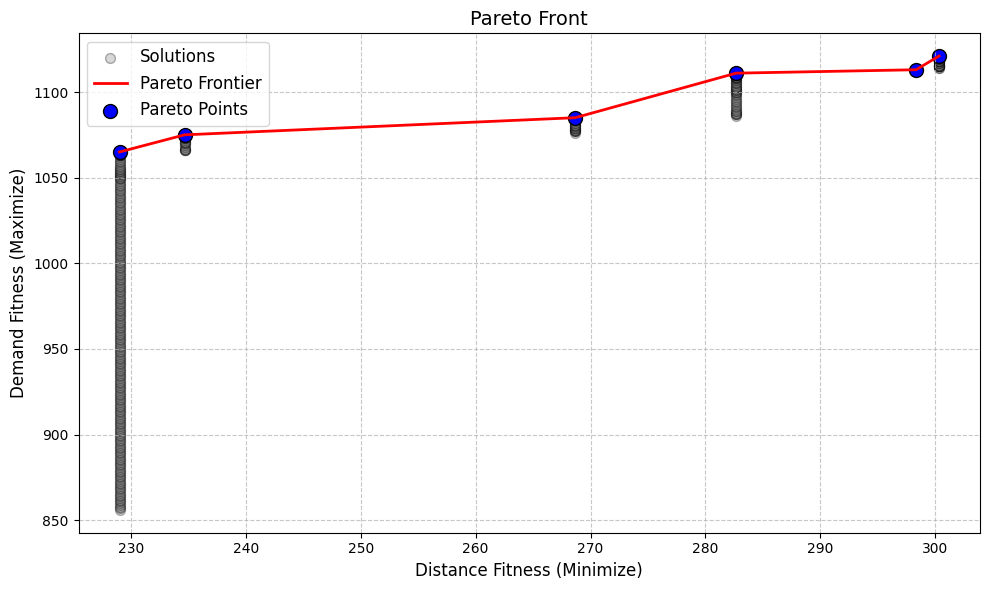

Pareto Frontier Chromosomes:
Point 1 -> Distance Fitness: 228.99999999999997, Demand Fitness: 1065
Chromosome: 
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [16 30 27]
  [ 8 10  1]
  [ 0  0  0]
  [ 9  5  4]
  [ 0  0  0]
  [17 18 11]
  [ 0  0  0]
  [ 0  0  0]
  [10 17  0]
  [ 0  0  0]
  [ 0  0  0]
  [16  4 13]]

 [[18 44 17]
  [26  9 24]
  [11 22 22]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 9  1  7]
  [ 6  0 19]
  [ 0  0  0]
  [ 0  0  0]
  [14 10  7]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [21  0 24]
  [ 0  0  0]
  [ 1  5  9]
  [39  1  8]
  [ 2 30  2]
  [ 0 13 32]
  [ 0 14  1]
  [ 0  1  8]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 3  2  6]
  [26 40  8]
  [ 0  0  0]
  [14 33 18]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [37 11 30]
  [ 0  0  0]
  [ 0  0 

In [58]:
# Extract fitness and corresponding chromosomes from the fitness history
distance_fitness = []
demand_fitness = []
chromosome_list = []

# Iterate over the history to extract values
for (current_solution, (current_distance, current_demand)) in fitness_history:
    distance_fitness.append(current_distance)  # Distance fitness
    demand_fitness.append(current_demand)      # Demand fitness
    chromosome_list.append(current_solution)    # Corresponding chromosome

# Convert to numpy arrays
distance_fitness = np.array(distance_fitness)
demand_fitness = np.array(demand_fitness)
chromosome_list = np.array(chromosome_list)

# Apply Pareto set filtering to get only the Pareto-optimal points
pareto_mask = paretoset(np.array(list(zip(distance_fitness, demand_fitness))), sense=['min', 'max'])
pareto_distance_fitness = distance_fitness[pareto_mask]
pareto_demand_fitness = demand_fitness[pareto_mask]
pareto_chromosome_list = chromosome_list[pareto_mask]

# Plot the Pareto frontier and print the chromosomes associated with each Pareto frontier point
plot_pareto_frontier(distance_fitness, demand_fitness, chromosome_list, pareto_distance_fitness, pareto_demand_fitness, pareto_chromosome_list)
